# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt

# Set today's date
todays_date = dt.date.today().strftime("%m/%d/%Y")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [64]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
# Create city data DataFrame
city_data_pd = pd.DataFrame({"City": [""], "Cloudiness": [""], "Country": [""],
                            "Date": [""], "Humidity": [""], "Lat": [""], "Lng": [""],
                            "Max Temp": [""], "Wind Speed": [""]})

In [66]:
# Set units as Imperial
units = "Imperial"

# For loop to process and pull all city temperature data
for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = f"{url}&appid={api_key}&q={city}&units={units}"
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # Print city number and city name as loop is being processed
        city_number = weather_json["id"]
        print(f"City Name: {city}, City Number: {city_number}")      
      
        # Pull specific json data and store into variables
        cloudiness = weather_json["clouds"]["all"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        humidity = weather_json["main"]["humidity"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        city = weather_json["name"]
        max_temp = weather_json["main"]["temp_max"]
        wind_speed = weather_json["wind"]["speed"]
        
        # Append into a DataFrame
        city_data_pd = city_data_pd.append({'City' : city, 'Cloudiness' : cloudiness, 
                                           'Country': country, 'Date': date, 'Humidity': humidity,
                                           'Lat' : lat, 'Lng' : lng, 'Max Temp' : max_temp,
                                           'Wind Speed' : wind_speed}, ignore_index=True)
    except KeyError:
        print("Continuing with the code...")

City Name: tuktoyaktuk, City Number: 6170031
City Name: moyale, City Number: 186180
City Name: lebu, City Number: 344979
City Name: rikitea, City Number: 4030556
City Name: mataura, City Number: 6201424
City Name: jingdezhen, City Number: 1805680
City Name: hilo, City Number: 5855927
Continuing with the code...
City Name: bambous virieux, City Number: 1106677
City Name: bluff, City Number: 2175403
City Name: the valley, City Number: 3573374
City Name: puerto ayora, City Number: 3652764
City Name: busselton, City Number: 2075265
Continuing with the code...
City Name: lashio, City Number: 1314759
City Name: vestmannaeyjar, City Number: 3412093
City Name: punta arenas, City Number: 3874787
City Name: ushuaia, City Number: 3833367
City Name: avarua, City Number: 4035715
City Name: nzega, City Number: 150930
City Name: madingou, City Number: 2257990
City Name: saint-philippe, City Number: 6138908
City Name: tasiilaq, City Number: 3424607
City Name: vaini, City Number: 1273574
City Name: jam

City Name: mount gambier, City Number: 2156643
City Name: labuhan, City Number: 1641899
City Name: hanna, City Number: 5970234
City Name: lavrentiya, City Number: 4031637
City Name: griffith, City Number: 2164422
City Name: marawi, City Number: 1701054
City Name: ginir, City Number: 336454
City Name: tutoia, City Number: 3385899
City Name: la rioja, City Number: 3848950
City Name: susangerd, City Number: 137268
Continuing with the code...
Continuing with the code...
City Name: alofi, City Number: 4036284
City Name: ulladulla, City Number: 2145554
City Name: provideniya, City Number: 4031574
City Name: hasaki, City Number: 2112802
City Name: quatre cocos, City Number: 1106643
City Name: destin, City Number: 4153188
City Name: prattville, City Number: 4084796
City Name: pevek, City Number: 2122090
City Name: ellensburg, City Number: 5793639
City Name: arraial do cabo, City Number: 3471451
City Name: porto novo, City Number: 6322184
City Name: codrington, City Number: 2160063
City Name: v

City Name: aksu, City Number: 1524298
City Name: gashua, City Number: 2341656
City Name: lubango, City Number: 3347762
City Name: hami, City Number: 1529484
City Name: watsa, City Number: 204283
City Name: huilong, City Number: 1795424
City Name: longyearbyen, City Number: 2729907
City Name: bridlington, City Number: 2654728
City Name: tangwani, City Number: 1163912
City Name: abu kamal, City Number: 174448
City Name: dunedin, City Number: 2191562
City Name: coxim, City Number: 3465228
City Name: kenai, City Number: 5866063
City Name: emerald, City Number: 2167426
City Name: dustlik, City Number: 1514125
City Name: henties bay, City Number: 3356832
City Name: klaksvik, City Number: 2618795
City Name: kokopo, City Number: 2093685
City Name: axim, City Number: 2303611
City Name: pundaguitan, City Number: 1698289
City Name: beyneu, City Number: 610298
City Name: hovd, City Number: 7626384
Continuing with the code...
City Name: locri, City Number: 2524371
City Name: vestmanna, City Number:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [67]:
# Export to csv
city_data_pd.to_csv(output_data_file)

# Drop empty row and all NaN's
city_data_pd = city_data_pd.dropna(how='all')
city_data_pd = city_data_pd.drop([0])

# Preview DataFrame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Tuktoyaktuk,20,CA,1551243600,84,69.44,-133.03,1.4,4.7
2,Moyale,0,ET,1551248101,37,3.52,39.05,77.31,11.03
3,Lebu,0,ET,1551243600,36,8.96,38.73,62.6,4.7
4,Rikitea,80,PF,1551248102,98,-23.12,-134.97,80.28,12.93
5,Mataura,92,NZ,1551247807,65,-46.19,168.86,52,20


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

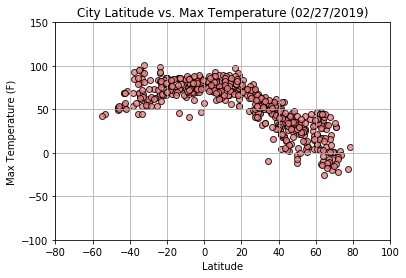

In [68]:
# Convert columns from string to float
columns_to_convert = ['Cloudiness','Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']

for column in columns_to_convert:
    city_data_pd[column] = city_data_pd[column].astype(float)
    
# Set x and y variables
x1 = city_data_pd["Lat"]
y1 = city_data_pd["Max Temp"]

# Build scatter plot
plt.scatter(x1, y1, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.8, linewidth=1, label="Lat v. Temp")

plt.title(f"City Latitude vs. Max Temperature ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.xlim(-80,100)
plt.ylim(-100,150)

# Save image
plt.savefig("Images/LatitudeVsTemperature.png")

# Show image
plt.show()

#### Latitude vs. Humidity Plot

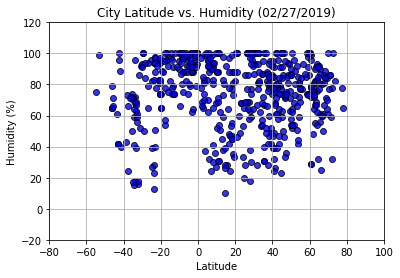

In [69]:
# Set x and y variables
x2 = city_data_pd["Lat"]
y2 = city_data_pd["Humidity"]

# Build scatter plot
plt.scatter(x2, y2, marker="o", facecolors="blue", edgecolors="black", alpha=0.8, linewidth=1, label="Lat v. Humid")

plt.title(f"City Latitude vs. Humidity ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-80,100)
plt.ylim(-20,120)

# Save image
plt.savefig("Images/LatitudeVsHumidity.png")

# Show image
plt.show()

#### Latitude vs. Cloudiness Plot

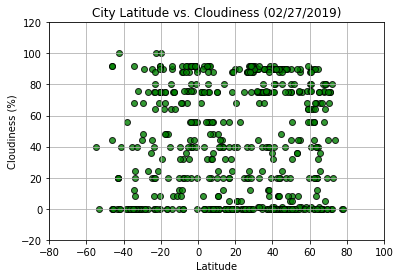

In [70]:
# Set x and y variables
x3 = city_data_pd["Lat"]
y3 = city_data_pd["Cloudiness"]

# Build scatter plot
plt.scatter(x3, y3, marker="o", facecolors="green", edgecolors="black", alpha=0.8, linewidth=1, label="Lat v. Cloud")

plt.title(f"City Latitude vs. Cloudiness ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim(-80,100)
plt.ylim(-20,120)

# Save image
plt.savefig("Images/LatitudeVsCloudiness.png")

# Show image
plt.show()

#### Latitude vs. Wind Speed Plot

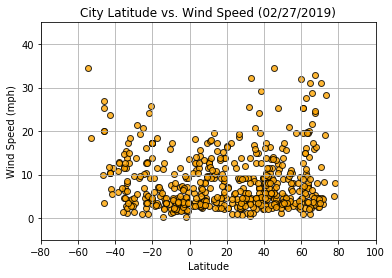

In [71]:
# Set x and y variables
x4 = city_data_pd["Lat"]
y4 = city_data_pd["Wind Speed"]

# Build scatter plot
plt.scatter(x4, y4, marker="o", facecolors="orange", edgecolors="black", alpha=0.8, linewidth=1, label="Lat v. Wind")

plt.title(f"City Latitude vs. Wind Speed ({todays_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim(-80,100)
plt.ylim(-5,45)

# Save image
plt.savefig("Images/LatitudeVsWindSpeed.png")

# Show image
plt.show()

In [72]:
# 4 observable trends:
# 1. As latitudes get closer to zero (the equator), temperature data is more clustered
# around higher temperatures.
# 2. As latitudes get closer to zero (the equator), humidity data is a bit more scattered, 
# but generally more clustered from -10 degrees Lat to 0 degrees Lat.
# 3. Latitude vs cloudiness data, as well as latitude vs wind speed data, is a lot more
# scattered. There are generally higher wind speeds as you go further away from the equator, however.
# 4. The data representation is also dependent on when the data is pulled, as seasonal factors
# play a big part in current weather conditions.